In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Machine Learning: Unsupervised Learning, Agents
## Part 3 : Company clustering customers
### Method 1 : K-means

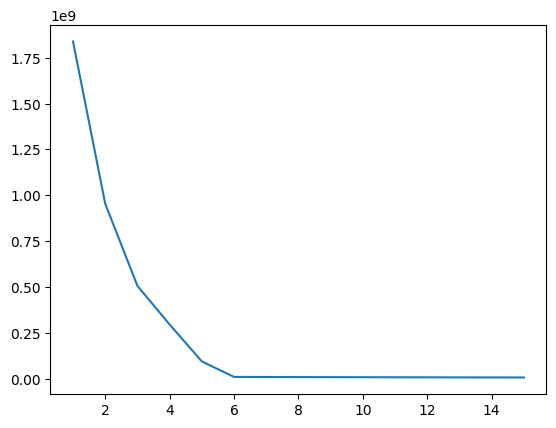

In [2]:
data = np.load('./data/data.npy')
#print(data)

n_samples = range(1, 16)
inertia = []

for n in n_samples:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(n_samples, inertia)

We pick 6 samples for the k-means.

### Method 2 : Agglomerative clustering

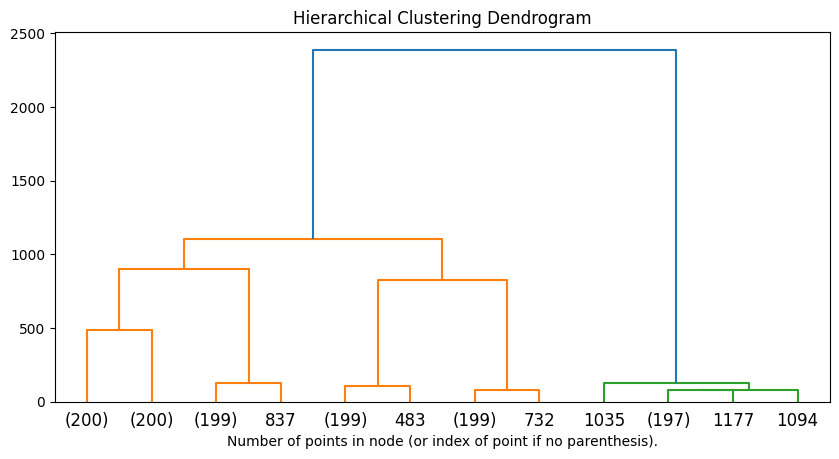

In [3]:
data = np.load('./data/data.npy')

# Scale the data to change metrics
def scale(d):
    if len(d) != 4:
        print('could not scale')
        return d
    scale_values = [2, 0.5, 1, 1]
    for i in range(0, 4):
        d[i] = d[i] * scale_values[i]
    return d

data = list(map(scale, data))

# Dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single").fit(data)
fig, ax = plt.subplots()
fig.set_figwidth(10)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)#, distance_sort=True, show_leaf_counts=True)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

We pick 2 samples for the agglomerative clustering.